In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [62]:
main_df = pd.read_csv("ten_percent_sample.csv")
nlp_df = pd.read_csv("nlp.csv")
follower_df = pd.read_csv("followers.csv")

In [63]:
nlp_df = nlp_df[['Ids', 'Sentiment']]
main_df = pd.merge(main_df, nlp_df, on="Ids")


In [64]:
follower_df.columns = ["User", "FollowerCount"]
main_df = pd.merge(main_df, follower_df, on="User", how="left")

In [65]:
main_df = main_df[~main_df.FollowerCount.isna()].drop("Unnamed: 0", axis=1)
print(main_df.head(10))

       Target         Ids                          Date      Flag  \
1    POSITIVE  2063039275  Sun Jun 07 01:09:14 PDT 2009  NO_QUERY   
9    NEGATIVE  1977994438  Sat May 30 22:10:57 PDT 2009  NO_QUERY   
17   POSITIVE  1827937911  Sun May 17 11:45:26 PDT 2009  NO_QUERY   
23   NEGATIVE  2261064534  Sat Jun 20 20:12:27 PDT 2009  NO_QUERY   
31   NEGATIVE  1794059792  Thu May 14 04:50:31 PDT 2009  NO_QUERY   
63   NEGATIVE  2251605427  Sat Jun 20 04:02:01 PDT 2009  NO_QUERY   
75   NEGATIVE  2237001651  Fri Jun 19 04:59:31 PDT 2009  NO_QUERY   
90   POSITIVE  1836117733  Mon May 18 07:24:18 PDT 2009  NO_QUERY   
105  NEGATIVE  2054587656  Sat Jun 06 07:40:30 PDT 2009  NO_QUERY   
158  NEGATIVE  1792251412  Wed May 13 22:35:28 PDT 2009  NO_QUERY   

                User                                               Text  \
1    demi_lovat0fans  @Tyrone17 oh haha you just asked the same thin...   
9          cybersass  @Rubyletters morning to you. I also got home s...   
17      JodieCo

In [66]:
main_df.describe()

,Ids,FollowerCount
count,1.205000e+03,1205.000000
mean,1.995704e+09,2531.375934
std,2.010827e+08,26569.085064
min,1.467996e+09,0.000000
25%,1.932276e+09,12.000000
50%,2.012715e+09,103.000000
75%,2.177735e+09,517.000000
max,2.328820e+09,821436.000000


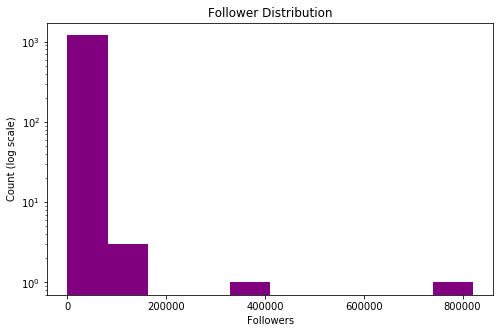

In [111]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')
plt.title("Follower Distribution")
plt.xlabel("Followers")
plt.ylabel("Count (log scale)")
_ = plt.hist(main_df.FollowerCount, color='purple')
plt.show()

In [68]:
influencers = main_df[main_df.FollowerCount > 517]
public = main_df[main_df.FollowerCount <= 517]
print(f"There are {influencers.shape[0]} influencers and {public.shape[0]} non-influencers")

There are 301 influencers and 904 non-influencers


In [104]:
influencers.describe()

,Ids,FollowerCount
count,3.010000e+02,301.000000
mean,1.981175e+09,9828.727575
std,1.993247e+08,52552.909221
min,1.467996e+09,522.000000
25%,1.883538e+09,894.000000
50%,1.998533e+09,1904.000000
75%,2.069110e+09,5341.000000
max,2.327751e+09,821436.000000


In [105]:
public.describe()

,Ids,FollowerCount
count,9.040000e+02,904.000000
mean,2.000542e+09,101.616150
std,2.015417e+08,129.289394
min,1.468021e+09,0.000000
25%,1.932516e+09,5.000000
50%,2.014419e+09,44.500000
75%,2.180848e+09,147.000000
max,2.328820e+09,517.000000


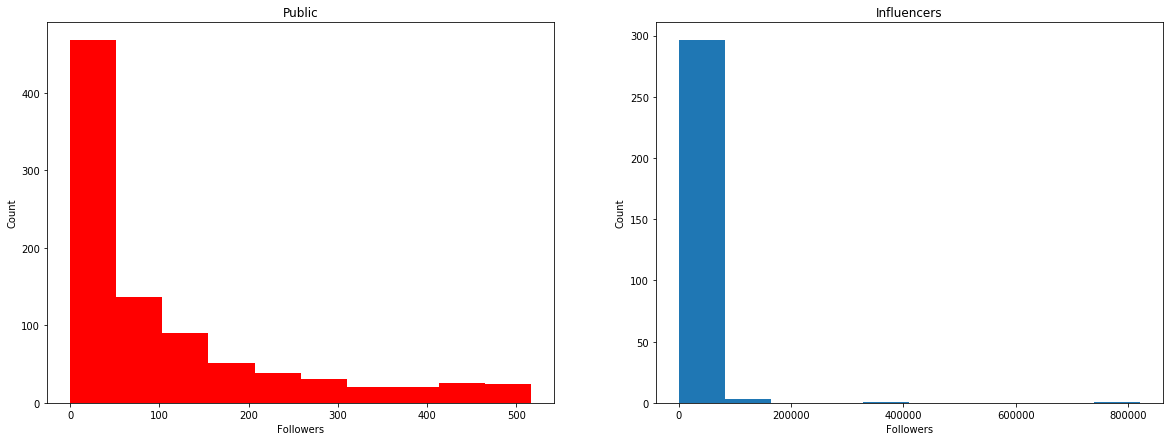

In [121]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("Public")
plt.xlabel("Followers")
plt.ylabel("Count")
_ = plt.hist(public.FollowerCount, color='red')
plt.subplot(1,2,2)
plt.title("Influencers")
plt.xlabel("Followers")
plt.ylabel("Count")
_ = plt.hist(influencers.FollowerCount)
plt.show()

In [70]:
influencer_len = [len(t) for t in influencers.Text]
public_len = [len(t) for t in public.Text]

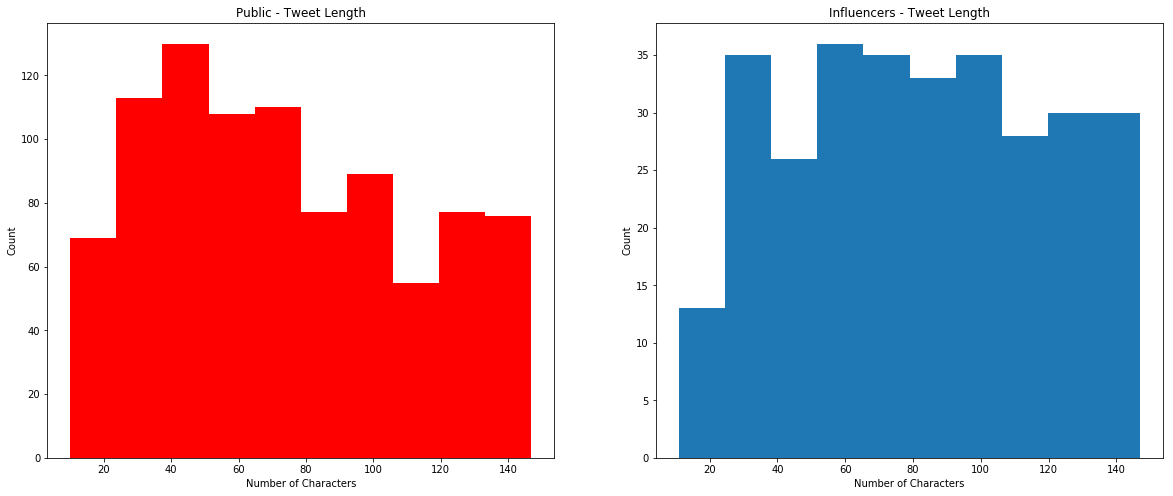

In [122]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Public - Tweet Length")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
_ = plt.hist(public_len, color='red')
plt.subplot(1,2,2)
plt.title("Influencers - Tweet Length")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
_ = plt.hist(influencer_len)
plt.show()

In [72]:
print("Influencers, Mean Tweet Length: {}".format(round(np.mean(influencer_len), 2)))
print("Influencers, Median Tweet Length: {}".format(round(np.median(influencer_len), 2)))
print()
print("Public, Mean Tweet Length: {}".format(round(np.mean(public_len),2)))
print("Public, Median Tweet Length: {}".format(round(np.median(public_len), 2)))

Influencers, Mean Tweet Length: 81.18
Influencers, Median Tweet Length: 79.0

Public, Mean Tweet Length: 73.28
Public, Median Tweet Length: 69.0


In [73]:
sim_count = 0
for T, V in zip(main_df.Target, main_df.Sentiment):
    try:
        if T.lower() == V.lower():
            sim_count += 1
    except AttributeError:
        continue
print(sim_count / len(main_df.Target))

0.2970954356846473


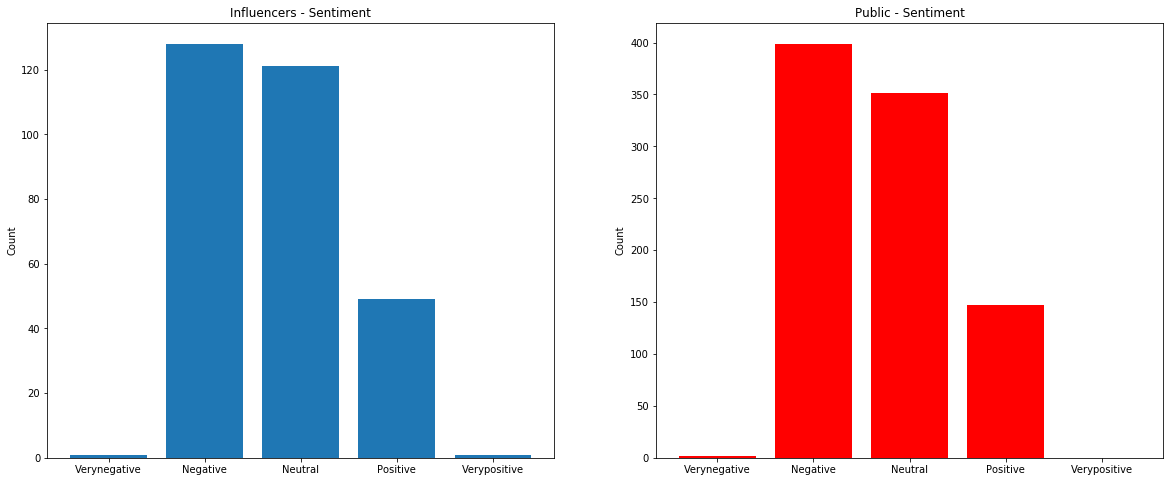

In [124]:
plt.figure(figsize=(20,8))
i_sent_count = Counter()
for s in influencers[~influencers.Sentiment.isna()].Sentiment:
    i_sent_count[s] +=1

p_sent_count = Counter()
for s in public[~public.Sentiment.isna()].Sentiment:
    p_sent_count[s] +=1

bars = ['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive']
plt.subplot(121)
plt.title('Influencers - Sentiment')
plt.ylabel("Count")
_ = plt.bar(bars, [i_sent_count[b] for b in bars])
plt.subplot(122)
plt.title('Public - Sentiment')
plt.ylabel("Count")
_ = plt.bar(bars, [p_sent_count[b] for b in bars], color='red')
plt.show()

In [103]:
i_ats = 0
p_ats = 0
for tweet in influencers.Text:
    if "@" in tweet:
        i_ats += 1
for tweet in public.Text:
    if "@" in tweet:
        p_ats += 1
print(i_ats / len(influencers.Text))
print(p_ats / len(public.Text))

0.654485049833887
0.41814159292035397


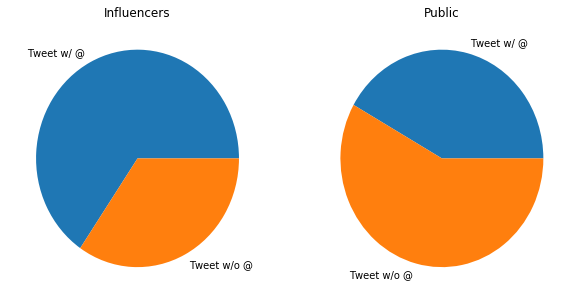

In [136]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Influencers")
_ = plt.pie([i_ats, len(influencers.Text)-i_ats], labels=["Tweet w/ @", "Tweet w/o @"])
plt.subplot(122)
plt.title("Public")
_ = plt.pie([p_ats, len(public.Text)-p_ats], labels=["Tweet w/ @", "Tweet w/o @"])
plt.show()